In [35]:
import pandas as pd
import ternary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR, fps
import warnings
warnings.filterwarnings("ignore")
from synth_data.plotting_helpers_mixture_frederic import plot_mixture_4d

data = pd.read_csv('synth_data/test_results_ensemble_30models.csv')

In [39]:
all_els = ['Ni','Al','Cu','Pt','Zn',]

#els = ['Mo','Ce','Ti','Ba']
els = ['Ni','Al','Cu','Pt','Zn','O']

inds = []
for ii,i in enumerate(data['comp'].values):
    if (els[0] in i)&(els[1] in i)&(els[2] in i)&(els[3] in i)&(len(i.split(' '))==4):
        inds.append(ii)
    elif (els[0] in i)&(els[1] in i)&(els[2] in i)&(len(i.split(' '))==3):
        inds.append(ii)
    elif (els[0] in i)&(els[1] in i)&(els[3] in i)&(len(i.split(' '))==3):
        inds.append(ii)
    elif (els[1] in i)&(els[2] in i)&(els[3] in i)&(len(i.split(' '))==3):
        inds.append(ii)

inds = np.arange(data.values.shape[0])

print(len(inds))


53124


In [40]:
comps = data['comp'].values[inds]
score = data['score'].values[inds]

In [41]:
cm = []
for ci in comps:
    sp = ci.split(' ')
    line = np.zeros(6)
    for si in sp:
        try:
            val = float(si[-2:])
        except:
            val = float(si[-1:])
        try:
            ind = els.index(si[:2])
        except:
            ind = els.index(si[:1])
        line[ind] = val
    cm.append(line)
cm = np.vstack(cm)

<Axes3D: >

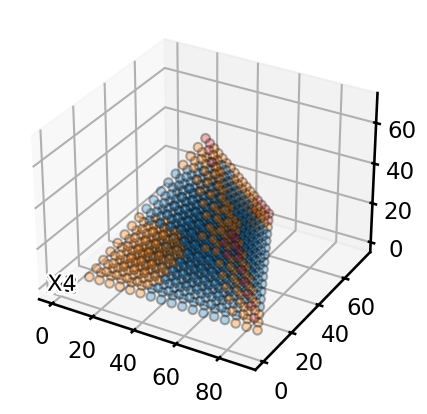

In [44]:
labels = np.zeros(score.shape)
labels[(score>.5)&(cm[:,-1]!=0)] = 1.
labels[(score>.5)&(cm[:,-1]==0)] = 2.
labels[(score>.8)&(cm[:,-1]!=0)] = 3.
labels[(score>.8)&(cm[:,-1]==0)] = 4.

inds = set([0,2,3,5])
ninds = set(range(len(els)))-inds
pl = []
cmp = []
for ii,i in enumerate(cm):
    nz = set(np.where(i==0)[0])
    if nz == ninds:
        cmp.append(ii)
plot_mixture_4d([pd.DataFrame(cm[:,list(inds)][cmp])],[labels[cmp]])

In [29]:
inds

{1, 2, 3, 4}

(array([6332., 4664., 3749., 3355., 3148., 2802., 2600., 2306., 2084.,
        2014., 1736., 1644., 1557., 1358., 1315., 1251., 1209., 1130.,
        1205., 1154., 1092.,  983.,  887.,  861.,  785.,  684.,  473.,
         337.,  274.,  135.]),
 array([1.44278651e-04, 3.26566836e-02, 6.51690886e-02, 9.76814936e-02,
        1.30193899e-01, 1.62706304e-01, 1.95218709e-01, 2.27731114e-01,
        2.60243519e-01, 2.92755924e-01, 3.25268329e-01, 3.57780734e-01,
        3.90293139e-01, 4.22805544e-01, 4.55317949e-01, 4.87830354e-01,
        5.20342759e-01, 5.52855164e-01, 5.85367569e-01, 6.17879974e-01,
        6.50392379e-01, 6.82904784e-01, 7.15417189e-01, 7.47929594e-01,
        7.80441999e-01, 8.12954404e-01, 8.45466809e-01, 8.77979214e-01,
        9.10491619e-01, 9.43004024e-01, 9.75516429e-01]),
 <BarContainer object of 30 artists>)

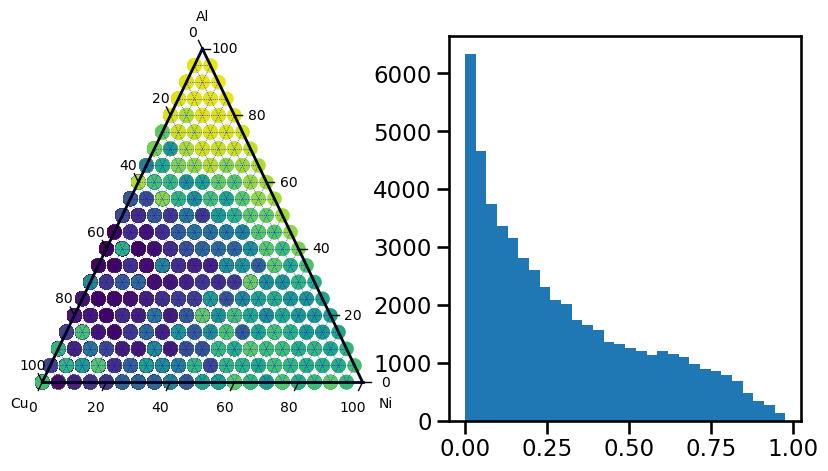

In [45]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.scatter(cm, c=score)
tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
ax2.hist(score,bins=30)

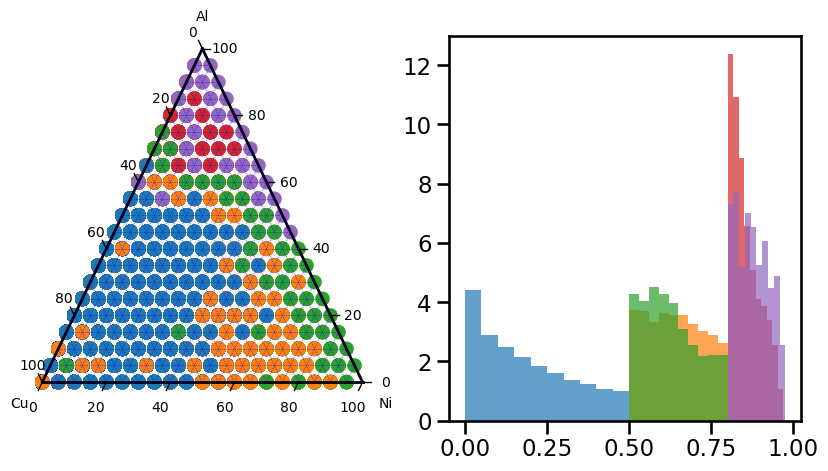

In [46]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

#bgm = BayesianGaussianMixture(n_components=2).fit(score.reshape(-1,1))
#labels = bgm.predict(score.reshape(-1,1))
labels = np.zeros(score.shape)
labels[(score>.5)&(cm[:,-1]!=0)] = 1.
labels[(score>.5)&(cm[:,-1]==0)] = 2.
labels[(score>.8)&(cm[:,-1]!=0)] = 3.
labels[(score>.8)&(cm[:,-1]==0)] = 4.
try:
    fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
    fontsize=10
    tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
    tax.scatter(cm, c=labels,cmap='tab10',vmin=0,vmax=10)
    tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=5)
    tax.right_corner_label(els[0], fontsize=fontsize)
    tax.top_corner_label(els[1], fontsize=fontsize)
    tax.left_corner_label(els[2], fontsize=fontsize)
    for i in np.unique(labels):
        ax2.hist(score[labels==i],density=True, alpha=0.7)
except:
    pass

In [47]:
def f(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return vals[ind]

def get_label(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return ref_labels[ind]

x = y = np.linspace(-1,1,50)
mesh = np.meshgrid(x,y)
xy = np.vstack([m.ravel() for m in mesh]).T

grid = cm
vals = score
ref_labels = labels

In [48]:
np.random.seed(42)

X_init = fps(grid,20)
y_init = np.array([f(xi) for xi in X_init])

x_test = fps(grid,10000)

In [58]:
regm = 'PORFC'
clm = 'RFC'


n_iter = 400
nb = 20
n_iter_b = int(n_iter/nb)

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=.3, 
             est_labels='known', N_batch=nb, 
             class_method = clm, reg_method = regm)

bor.run(n_iter_b)

#rand = BO_RFR(X_init, y_init, grid, f, x_test, 
#              acq='random',gl = get_label,  
#              est_labels='known', N_batch=1,
#              class_method = clm, reg_method = regm)

#rand.run(n_iter)
#
#sf = BO_RFR(X_init, y_init, grid, f, x_test, 
#            acq='SF',gl = get_label, 
#            est_labels='known', N_batch=1,
#            class_method = clm, reg_method = regm)
#
#sf.run(n_iter)

generating test data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1047.09it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:26<00:00,  1.31s/it]


In [59]:
bor.scores[-1]

0.3772626028241356

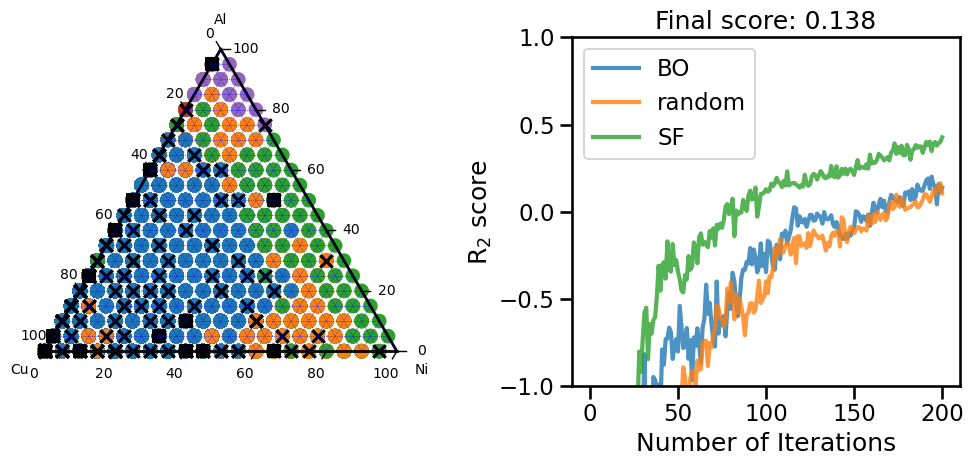

In [50]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.scatter(cm, c=bor.classifier.predict(grid),cmap='tab10',vmin=0,vmax=10)
tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
tax.scatter(bor.X, c='k', marker='x')
tax.scatter(X_init, c='k', marker='s')

ax2.plot(np.arange(bor.n_iters+1)*nb,bor.scores,lw=3,alpha=0.8, label='BO')
ax2.plot(np.arange(rand.n_iters+1),rand.scores,lw=3,alpha=0.8, label='random')
ax2.plot(np.arange(sf.n_iters+1),sf.scores,lw=3,alpha=0.8, label='SF')
ax2.set_title('Final score: %.3f'%bor.scores[-1])
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('R$_2$ score')
ax2.set_ylim(-1,1)
ax2.legend()
plt.tight_layout()

In [51]:
from sklearn.metrics import f1_score
for m in (bor,rand,sf):
    print(f1_score(ref_labels, m.classifier.predict(grid), average='weighted'))

0.8092325996244363
0.7565743597270453
0.7963406502217036


In [52]:
for m in (bor,rand,sf):
    E = vals - m.model.predict(grid)
    RMSE = np.sqrt(np.mean(E**2))
    print(RMSE)

0.14351697793814594
0.15605149596158524
0.12857840192654366


In [53]:
gpr = BO_RFR(X_init, y_init, grid, f, x_test, acq='SF',gl = get_label, cl_weight=0.3, est_labels='known', N_batch=1, gpr=True)

gpr.run(n_iter)
gpr.scores[-1]

generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 327.19it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:03<00:00,  3.13it/s]


-27.787091749343784